<a href="https://colab.research.google.com/github/fayyadh678/TUGAS-DAA/blob/main/Fayyadh_DAA_Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import heapq

def prim(graph, start):
    mst = []
    visited = set()
    min_edges = [(0, start, None)]

    while min_edges:
        weight, current, from_node = heapq.heappop(min_edges)
        if current not in visited:
            visited.add(current)
            if from_node is not None:
                mst.append((from_node, current, weight))

            for neighbor, weight in graph[current]:
                if neighbor not in visited:
                    heapq.heappush(min_edges, (weight, neighbor, current))

    return mst

# Contoh graph
graph = {
    'A': [('B', 24), ('D', 10)],
    'B': [('A', 24), ('C', 15)],
    'C': [('B', 15), ('F', 14)],
    'D': [('A', 10), ('G', 15)],
    'E': [('F', 8)],
    'F': [('C', 14), ('E', 8)],
    'G': [('D', 15), ('H', 21)],
    'H': [('G', 21), ('F', 18)],
    'I': []
}

mst_prim = prim(graph, 'A')
print("MST (Prim):", mst_prim)

MST (Prim): [('A', 'D', 10), ('D', 'G', 15), ('G', 'H', 21), ('H', 'F', 18), ('F', 'E', 8), ('F', 'C', 14), ('C', 'B', 15)]


In [ ]:
def find(parent, node):
    if parent[node] != node:
        parent[node] = find(parent, parent[node])
    return parent[node]

def kruskal(graph):
    edges = []

    for node in graph:
        for neighbor, weight in graph[node]:
            edges.append((weight, node, neighbor))

    edges.sort()
    parent = {node: node for node in graph}
    mst = []

    for weight, u, v in edges:
        root_u = find(parent, u)
        root_v = find(parent, v)
        if root_u != root_v:
            parent[root_u] = root_v
            mst.append((u, v, weight))

    return mst

mst_kruskal = kruskal(graph)
print("MST (Kruskal):", mst_kruskal)

MST (Kruskal): [('E', 'F', 8), ('A', 'D', 10), ('C', 'F', 14), ('B', 'C', 15), ('D', 'G', 15), ('H', 'F', 18), ('G', 'H', 21)]


In [ ]:
def greedy_shortest_path(graph, start, goal):
    queue = [(0, start)]
    visited = set()
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_distance

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    return distances[goal]

shortest_path_distance = greedy_shortest_path(graph, 'A', 'F')
print("Shortest Path (Greedy):", shortest_path_distance)

Shortest Path (Greedy): 53


Kelemahan Metode Greedy
Metode Greedy tidak selalu menghasilkan solusi optimal. Misalnya, dalam beberapa kasus, pilihan terbaik lokal tidak menghasilkan jalur terpendek secara global.
Penyelesaian yang diperoleh bisa lebih panjang atau tidak efisien dibandingkan dengan metode lain seperti Dijkstra atau A*.
Silakan terapkan langkah-langkah di atas sesuai diagram yang tersedia untuk mendapatkan hasil akhir.

In [12]:
!pip install networkx matplotlib

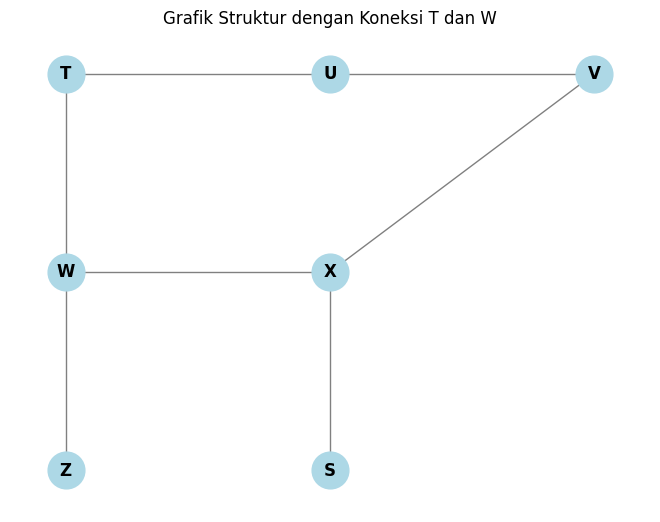

Edges terkait simpul T, U, dan V:
('T', 'U')
('T', 'W')
('U', 'V')
('V', 'X')


In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat grafik
G = nx.Graph()

# Menambahkan simpul
nodes = ['T', 'U', 'V', 'W', 'X', 'Z', 'S']
G.add_nodes_from(nodes)

# Menambahkan tepi (edges) sesuai dengan struktur yang diperbarui
edges = [
    ('T', 'U'),
    ('U', 'V'),
    ('T', 'W'),  # Koneksi baru antara T dan W
    ('W', 'X'),
    ('X', 'S'),
    ('W', 'Z'),
    ('V', 'X')  # Koneksi antara V dan X
]

G.add_edges_from(edges)

# Menggambar grafik
pos = {
    'T': (0, 2), 'U': (1, 2), 'V': (2, 2),
    'W': (0, 1), 'X': (1, 1),
    'Z': (0, 0), 'S': (1, 0)
}
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("Grafik Struktur dengan Koneksi T dan W")
plt.show()

# Menampilkan edge yang terkait dengan simpul T, U, V
print("Edges terkait simpul T, U, dan V:")
for edge in G.edges(['T', 'U', 'V']):
    print(edge)

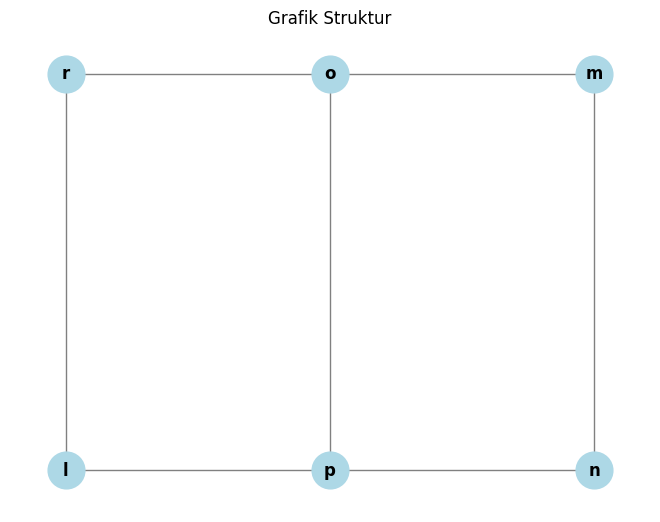

Edges terkait simpul 'r', 'o', dan 'm':
('r', 'o')
('r', 'l')
('o', 'm')
('o', 'p')
('m', 'n')


In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat grafik
G = nx.Graph()

# Menambahkan simpul
nodes = ['r', 'o', 'm', 'l', 'p', 'n']
G.add_nodes_from(nodes)

# Menambahkan tepi (edges) sesuai dengan struktur
edges = [
    ('r', 'o'),
    ('o', 'm'),
    ('r', 'l'),
    ('o', 'p'),
    ('m', 'n'),
    ('l', 'p'),
    ('p', 'n')
]

G.add_edges_from(edges)

# Menggambar grafik
pos = {
    'r': (0, 2), 'o': (1, 2), 'm': (2, 2),
    'l': (0, 1), 'p': (1, 1), 'n': (2, 1)
}
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("Grafik Struktur")
plt.show()

# Menampilkan edge yang terkait dengan simpul 'r', 'o', dan 'm'
print("Edges terkait simpul 'r', 'o', dan 'm':")
nodes_of_interest = ['r', 'o', 'm']
for edge in G.edges(nodes_of_interest):
    print(edge)